In [ ]:
# prompt: mout drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<ipython-input-5-8a60200501ef>:48: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/content/drive/MyDrive/labelClassification/label_classifia

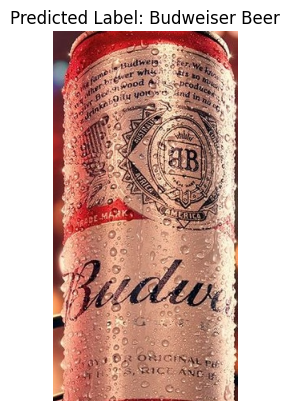

The predicted label for the image is: Budweiser Beer


In [ ]:
import torch
from torchvision import transforms, models
import torch.nn as nn
from PIL import Image
from collections import OrderedDict
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

label_mapping = {
    'Tiger Beer': 0,
    'Asahi Super Dry Beer': 1,
    'Kingfisher Beer': 2,
    'Budweiser Beer': 3,
    'Stella Artois': 4,
    'Becks Beer': 5,
    'Carlsberg Beer': 6,
    'Heineken Beer': 7,
    'Tuborg Beer': 8,
    'Corona Beer': 9
}

reverse_label_mapping = {v: k for k, v in label_mapping.items()}

class BeerModelInference(nn.Module):
    def __init__(self):
        super(BeerModelInference, self).__init__()
        self.network = models.vgg16(pretrained=True)

        self.network.classifier = nn.Sequential(OrderedDict([
            ('fc1', nn.Linear(25088, 512)),
            ('relu', nn.ReLU()),
            ('dropout', nn.Dropout(0.5)),
            ('fc2', nn.Linear(512, 10)),
            ('output', nn.LogSoftmax(dim=1))
        ]))

    def forward(self, xb):
        return self.network(xb)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BeerModelInference().to(device)

model.load_state_dict(torch.load('/content/drive/MyDrive/labelClassification/label_classifiations.pth', map_location=device))
model.eval()

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

def predict(image_path):
    image = Image.open(image_path).convert("RGB")
    image_tensor = transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        outputs = model(image_tensor)
        _, predicted_class = torch.max(outputs, 1)
        predicted_class = predicted_class.item()

    predicted_label = reverse_label_mapping[predicted_class]

    image = np.array(image)
    return predicted_label, image

image_path = '/content/drive/MyDrive/labelClassification/beerLabelDataset/Budweiser Beer/BUDWEISER _ MUSIC_logo_1.jpg'
predicted_label, image = predict(image_path)


plt.imshow(image)
plt.axis('off')
plt.title(f"Predicted Label: {predicted_label}")
plt.show()

print(f"The predicted label for the image is: {predicted_label}")
